In [2]:
# Import Dependencies
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Preprocessing

In [3]:
# Read in Titanic Dataset to Pandas DataFrame
preprocessed_df = pd.read_csv("../Data/DataPreprocessing.csv")
preprocessed_df.head()

,Survived,Age,Sibsp,Parch,Pclass,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Cabin_Location_Neither,Cabin_Location_Port,Cabin_Location_Starboard
0,0,22.0,1,0,3,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,38.0,1,0,1,71.2833,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,26.0,0,0,3,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,35.0,1,0,1,53.1000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,3,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
# Split data into features and target
X = preprocessed_df.drop("Survived", axis=1)
y = preprocessed_df["Survived"]

# Split preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Machine Learning Model

In [6]:
# Random Forest Classifier Model
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9898063200815495
Testing Score: 0.8475609756097561


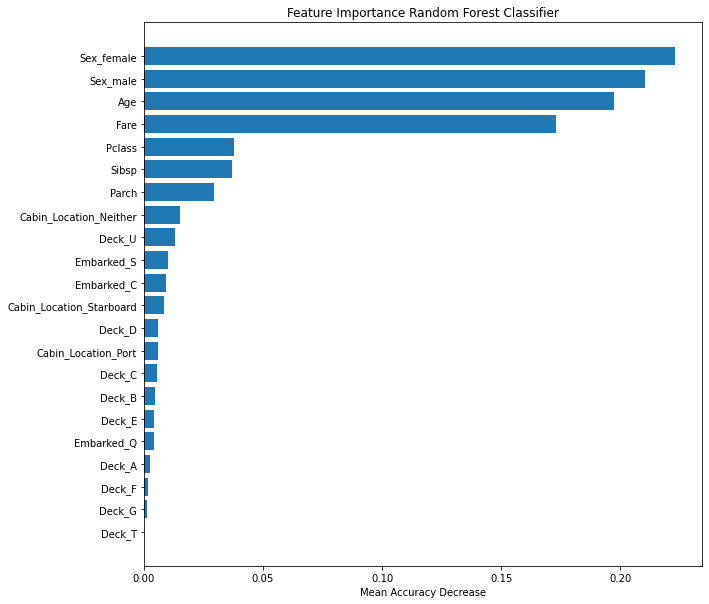

In [7]:
# Graph Feature Importances
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)

ax.barh(y=cols, width=width)
ax.set_title("Feature Importance Random Forest Classifier")
ax.set_xlabel("Mean Accuracy Decrease")

plt.show()